# HW2


Before submitting your **HTpy-HW2.ipynb** file, perform the following
* `Kernel>Restart & Run All`
* Make sure that there are no errors

The following includes problems that need coding and others that only need to perform simple operations (python as a calculator).

In [1]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

## 1 Insulation

This problem is an expansion of PB 3 in `HTpy-HW2.ipynb`

Assuming that the outer surface temperature of the pipe is $150^\circ C$, find an insulation that works (i.e. an insulation that will not melt, for which you can find the price and thermal conductivity online). Derive the necessary equations that allow for determination of the different costs as a function of the thickness. Generate a plot for at least 3 different thicknesses.

Hint: Derive the heat loss for a variable thickness of insulation, then apply this formula for a range of thicknesses. Compare savings of gas vs cost of insulation.

### Solution
Assumptions:
* Heat transfer is steady and 1D
* Conservation of energy applied to insulation
* Radiation and Convection heat transfers are negligible
* Room temperature on other side of insulation is 25 degrees Celsius

Given:
* Insulation is Glass Mineral Wool
    * k = 0.035 W/m*K
    *Price for 2 in x 48 in x 24 in = $\$18.10$ (Grainger)
*Price of natural gas: \$0.02
*Diameter of pipe: $R_{1} = 0.05 m$
*Length of pipe: $L = 25 m$

Conservation of Energy: The control volume is the insulation
$$ 
E_{in} - E_{out} = 0
$$

$$
q_{in} - q_{out} = 0
$$
Resulting in the fact that $q_{in}$ is equal to $q_{out}$, which in this case, $q_{out} = q_{cond}$.

Because the control volume is a cylinder, the heat transfer will only occur in the radial direction, but that varies based on the radius, which isn't constant.

$$
q_{cond} = \frac{2\pi kL (T_{s}- T_{1})}{ln \frac{R_{2}}{R_{1}}}
$$

The outer radius $R_{2}$ is the thickness of the insulation (t) plus the radius of the pipe, $R_{1}$, so the equation then becomes
$$
q_{cond} = \frac{2\pi kL (T_{s}- T_{1})}{ln \frac{t}{R_{1}}} 
$$

The price of mineral wool was $\$18.10$ for a 2'' x 48'' x 24'' size roll. This results in a total volume of:
$$
2*48*24 = 2304 in^3
$$
Therefore the price per unit volume is 
$$
\frac{\$18.10}{2304} = \$0.008 /in^3
$$
In meters that is $\$479.40 /m^3$.

The cost as a function of thickness, calculating the volume using the equation for a hollow sphere, would then be

$$
cost = 479.4 * \pi *L*((R_{1}+t)^2 - R_{1}^2)
$$

In [2]:
R_1 = 0.05 #Inner radius in meters
L = 25  #Length of pipe in meters
t = [0.06, 0.08, 0.1] #Thickness of insulation in meters
cost = [0, 0, 0]
gas_cost = [0, 0, 0]
q = [0,0,0]
k = 0.035 #W/m K
T_s = 150 # Celcius
T_1 = 25 #Celcius
price = 0.02  # $/MJ

i = 0
while (i<3):
    cost[i]= 479.4 * np.pi *L*((R_1+t[i])**2 - R_1**2) #Cost of insulation as a function of thickness.
    q[i] = (2*np.pi*k*L*(T_s - T_1))/(np.log(t[i]/R_1)) #Heat loss from pipe as a function of insulation thickness
    gas_cost[i] = (0.02/10**6)*q[i]*(365*60*60*24) #Cost of gas as a function of heat loss in a year
    i = i+1
    

print('The cost of insulation for insulation thickness 0.06 m, 0.08 m, and 0.1 m thickness respectively')
print(cost)
print('The cost of gas for a year with insulation thickness 0.06 m, 0.08 m, and 0.1 m thickness respectively')
print(gas_cost)

The cost of insulation for insulation thickness 0.06 m, 0.08 m, and 0.1 m thickness respectively
[361.4590843514272, 542.1886265271409, 753.0397590654735]
The cost of gas for a year with insulation thickness 0.06 m, 0.08 m, and 0.1 m thickness respectively
[2377.368568137171, 922.2174286427952, 625.329728767898]


<function matplotlib.pyplot.show(close=None, block=None)>

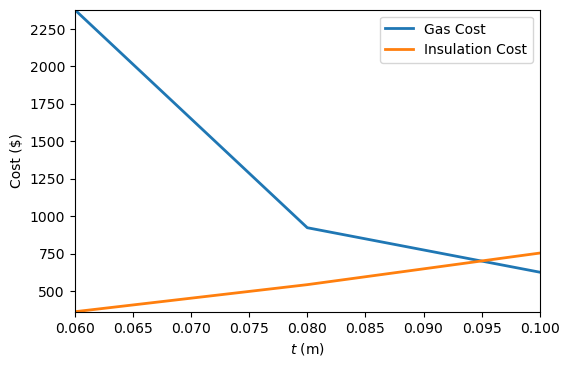

In [3]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(t,gas_cost, lw=2, label='Gas Cost')
plt.plot(t,cost, lw=2, label='Insulation Cost')
plt.xlim([t[0],t[2]])
plt.ylim([cost[0],gas_cost[0]])
plt.xlabel('$t$ (m)')
plt.ylabel('Cost (\$)')
plt.legend()
plt.show

The ideal thickness is approximately 0.095 meters. It can be seen the cost of gas decreases with increasing thickness, which means less heat is being lost. However, the cost of the insulation increases in relation to the amount of heat loss.

## 2 Window

Set up equations and apply realistic numerical values to them to discuss heat losses of a single pane window, a single pane window with storm window and a double paned window with air trapped at a vacuum of $10^{-3} \mathrm{torr}$ in a gap of $5\mathrm{mm}$. Do not consider the effects of radiation for any of the window.

<img src="ThermalCondAir.png" alt="my awesome sketch" width=100% >

### Solution
Assumptions:
* Heat transfer is steady and 1D
* Conservation of energy applied to window pane
* No energy being generated in the window
* Conduction is the only form of heat transfer
* Steady-state

* Standard window 
    * thickness = 2.38125 mm (Craig)
    * k = 0.96 $\frac{W}{m K}$ (Engineering Toolbox)
    * R = 0.00248 $\frac{m^2K}{W}$
* Storm window 
    * R = 0.352 $\frac{m^2K}{W}$ for a storm window plus a window pane (ColoradoEnergy)
    
* Outside Tmperature  
    * $T_{infty}$ = -18 $^\circ{C}$
* Inside Temperature
    * $T_{s}$ = 20 $^\circ{C}$
    
* For air, k = 0.003 $\frac{W}{m K}$
    * $R = \frac{.005}{0.003} = 1.667 \frac{m^2K}{W}$

### Single Pane
Conservation of Energy: The control volume is the single pane window
$$ 
E_{in} - E_{out} = 0
$$

$$
q''_{in} - q''_{out}  = 0
$$

$$
q''_{in} = q''_{out} = q''_{cond}
$$

Since the window is a single pane, Fourier's Law is
$$
q''_{cond} = -k \frac{T_{infty}-T_{0}}{t}
$$

Utilizing the thermal resistance model where for conduction, $R = \frac{L}{k}$, the equation then becomes

$$
q''_{cond} = -\frac{1}{R''_{cond}}(T_{infty} - T_{s})
$$


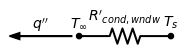

In [4]:
from Libraries import HT_thermal_resistance as res

Rth = []
Rth.append(res.Resistance("$R'_{cond,wndw}$",'W/m'))

import schemdraw as schem
import schemdraw.elements as e
# Create a new circuit
d = schem.Drawing()
#create a dot for inside temperature
d.add( e.DOT, label='$T_{\infty}$')
#create the first resistance
R0 = d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_{s}$')
L1 = d.add(e.LINE, toplabel = "$q''$", endpts = [[-0.25, 0], [-2.25, 0]])
d.labelI(L1, arrowofst = 0)
d.draw()

In [5]:
R_window = 0.00248 #m^2 K / W
T_infty = -18 # Celcius
T_s = 20 #Celcius

q_flux = (-1/R_window)*(T_infty - T_s) #W/m^2
print('The heat flux through the single window pane is %.2f W/m^2' %q_flux)

The heat flux through the single window pane is 15322.58 W/m^2


### Single Pane with Storm Window
Conservation of Energy: The control volume is the single pane window with the storm window
$$ 
E_{in} - E_{out} = 0
$$

$$
q''_{cond} - q''_{loss} = 0
$$

$$
q''_{loss} = q''_{cond}
$$

Using the thermal resistance model, the heat flux of conduction then becomes

$$
q''_{loss} = \frac{1}{R_{total}}(T_{infty} - T_s)
$$

Where $$R_{total} = R_{window} + R_{storm window}$$ 

since the standard and storm window are in series, the total thermal resistances add together for the total thermal resistance.



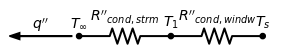

In [6]:
from Libraries import HT_thermal_resistance as res

Rth = []
Rth.append(res.Resistance("$R''_{cond,strm}$",'W/m'))
Rth.append(res.Resistance("$R''_{cond,windw}$",'W/m'))

import schemdraw as schem
import schemdraw.elements as e
# Create a new circuit
d = schem.Drawing()
#create a dot for inside temperature
d.add( e.DOT, label='$T_{\infty}$')
#create the first resistance
R0 = d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_1$')
R1 = d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.DOT, label='$T_{s}$')
L1 = d.add(e.LINE, toplabel = "$q''$", endpts = [[-0.25, 0], [-2.25, 0]])
d.labelI(L1, arrowofst = 0)
d.draw()

In [7]:
R_stormAndpane = 0.352 #m^2 K / W
R_total = R_stormAndpane
T_infty = -18 #Celcius
T_s = 20 #Celcius
q_flux2 = (-1/R_total)*(T_infty - T_s)
print('The heat flux through the window pane and storm window is %.2f W/m^2' %q_flux2)

The heat flux through the window pane and storm window is 107.95 W/m^2


### Double Pane with Air Trapped
Conservation of Energy: The control volume is the double window pane with the trapped air.
$$ 
E_{in} - E_{out} = 0
$$

$$
q''_{cond} - q''_{loss} = 0
$$

$$
q''_{loss} = q''_{cond}
$$
With the thermal resistance model, the three conductive resistances will add up, so the equation for heat flux is

$$
q''_{cond} = \frac{1}{R''_{total}}(T_{infty} - T_s)
$$

Where 
$$R''_{total} = R''_{window} + R''_{air} + R''_{window}$$


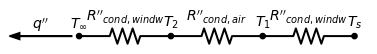

In [8]:
from Libraries import HT_thermal_resistance as res

Rth = []
Rth.append(res.Resistance("$R''_{cond,windw}$",'W/m'))
Rth.append(res.Resistance("$R''_{cond,air}$",'W/m'))
Rth.append(res.Resistance("$R''_{cond,windw}$",'W/m'))

import schemdraw as schem
import schemdraw.elements as e
# Create a new circuit
d = schem.Drawing()
#create a dot for inside temperature
d.add( e.DOT, label='$T_{\infty}$')
#create the first resistance
R0 = d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_2$')
R0 = d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.DOT, label='$T_{1}$')
R2 = d.add( e.RES, d='right', label=Rth[2].name )
d.add( e.DOT, label='$T_{s}$')
L1 = d.add(e.LINE, toplabel = "$q''$", endpts = [[-0.25, 0], [-2.25, 0]])
d.labelI(L1, arrowofst = 0)
d.draw()

In [9]:
R_window = 0.00248 #m^2 K / W
R_air = .005/.003 #m^2 K / W
R_total = R_window + R_air + R_window
T_infty = -18 #Celcius
T_s = 20 #Celcius
q_flux3 = (-1/R_total)*(T_infty - T_s)
print('The heat flux through the window pane and storm window is %.2f W/m^2' %q_flux3)

The heat flux through the window pane and storm window is 22.73 W/m^2


### Works Cited

ColoaradoEnergy.org. (n.d.). R-Value Table. Professionals Corner. Retrieved February 24, 2021 from https://www.coloradoenergy.org/procorner/stuff/r-values.htm

Craig, R. (2017). What is the thickness of glass used in most residential replacement windows? Retrieved on February 24, 2021 from https://www.energyswingwindows.com/about-us/news-and-events/27217-what-is-the-thickness-of-glass-used-in-most-residential-replacement-windows.html

Engineering ToolBox. (2003). Thermal Conductivity of some selected Materials and Gases. Retrieved February 24, 2021 from https://www.engineeringtoolbox.com/thermal-conductivity-d_429.html

Grainger. (n.d.). 2 in x 48 in x 24 in Mineral Wool high TEMPERATURE INSULATION, DENSITY 8#, GREEN. Retrieved February 23, 2021, from https://www.grainger.com/product/ROXUL-2-in-x-48-in-x-24-in-Mineral-19NE78

 